# Investigating summary statistics

This notebook tries to evaluate useful summary statistics for an event-related potential (averaged signal of an EEG).
The following evaluations are used:

- post predictive checks
- KL-divergence between $p(\Theta|x)$ and $p(\Theta|x_1)$ (in order to see if KL-divergence increases when certain feature is missing. This would indicate that this feature is important
- ratio of variances of the marginals $p(\Theta|x)$ and $p(\Theta|x_1)$. A high ratio would mean that feature is important (close to 1 would mean that the missing would not change much). 
- histogram plots that compare which feature values prior simulations would cause versus which feature values the posterior simulations cause. We should expect that the posterior histogram distributions are narrower but around the 'true oberservation' (that we unfortunately do not have for real).

In [97]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

from utils.plot import cov, compare_vars, plot_varchanges
from utils.plot import compare_KLs, plot_KLs

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model

from utils.simulation_wrapper import event_seed, set_network_default, simulation_wrapper,simulation_wrapper_obs, simulation_wrapper_all

sim_wrapper = simulation_wrapper_all


In [4]:
window_len = 30
prior_min = [0, 0, 0, 0, 17.3, 0, 0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 0.0519, 35.9, 0.039, 0.000042, 0.854, 0.117, 0.0259, 0.480, 75.08, 0.0000018, 8.633, 0.0537, 4.104, 162.110]

prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

assert (prior.event_shape==torch.Size([17]))
from utils import inference

In [39]:
from utils import inference
from utils.simulation_wrapper import event_seed, simulation_wrapper
import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



print(os.getcwd())

os.chdir('/home/ubuntu/results/')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
file = '10000_multi_round_num_params_17'

  

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))
x_without = torch.load('{}/obs_without.pt'.format(file))

x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

print(true_params)

/home/ubuntu/sbi_for_eeg_data
/home/ubuntu/sbi_for_eeg_data
tensor([[2.7700e-01, 3.9900e-02, 3.7390e-01, 3.4000e-02, 1.8977e+01, 1.1500e-02,
         1.2000e-05, 4.6600e-01, 6.3370e-02, 1.3400e-02, 7.6600e-02, 6.3080e+01,
         5.0000e-06, 4.6729e+00, 1.1500e-02, 3.3080e-01, 1.2086e+02]])


## Inference step:

In [36]:
density_estimator = 'nsf'



inf = SNPE(prior=prior, density_estimator = density_estimator)

#inf = SNPE_C(prior, density_estimator="nsf")

inf = inf.append_simulations(thetas, x)

density_estimator = inf.train()

posterior = inf.build_posterior(density_estimator)


#true_params = torch.tensor([[26.61, 63.53,  137.12]])

Neural network successfully converged after 29 epochs.


## Simulation under 'true parameters'

In [10]:
obs_real = inference.run_only_sim(true_params, simulation_wrapper = sim_wrapper)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
early stop 170.0
param size  17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.5s finished


In [11]:
obs_real_stat = calculate_summary_stats_temporal(obs_real)

samples = posterior.sample((10000,), x=obs_real_stat)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

In [12]:


parameter_names = ["prox_1_ampa_l2_bas\nstep1","prox_1_ampa_l2_pyr\nstep1","prox_1_ampa_l5_bas\nstep1","prox_1_ampa_l5_pyr\nstep1",
 "t_evprox_1\nstep1",
 "dist_ampa_l2_bas\nstep2","dist_ampa_l2_pyr\nstep2","dist_ampa_l5_pyr\nstep2",
 "dist_nmda_l2_bas\nstep2","dist_nmda_l2_pyr\nstep2","dist_nmda_l5_pyr\nstep2",
 "t_evdist_1\nstep2", 
 "prox_2_ampa_l2_bas\nstep3","prox_2_ampa_l2_pyr\nstep3","prox_2_ampa_l5_bas\nstep3","prox_2_ampa_l5_pyr\nstep3",
 "t_evprox_2\nstep3"]

In [13]:
##better limits:

list_min = list(torch.min(samples, 0)[0]-0.15)
list_max = list(torch.max(samples, 0)[0]+0.15)

limits = [list(tup) for tup in zip(list_min, list_max)]
limits

[[tensor(-0.1458), tensor(0.9498)],
 [tensor(-0.1500), tensor(0.3097)],
 [tensor(-0.1179), tensor(1.8434)],
 [tensor(-0.1479), tensor(0.2019)],
 [tensor(17.1662), tensor(20.9412)],
 [tensor(-0.1499), tensor(0.1890)],
 [tensor(-0.1500), tensor(0.1500)],
 [tensor(-0.1470), tensor(1.0040)],
 [tensor(-0.1499), tensor(0.2669)],
 [tensor(-0.1500), tensor(0.1758)],
 [tensor(-0.1311), tensor(0.2931)],
 [tensor(57.7741), tensor(66.0399)],
 [tensor(-0.1500), tensor(0.1500)],
 [tensor(2.8825), tensor(8.7646)],
 [tensor(-0.1500), tensor(0.2037)],
 [tensor(-0.1497), tensor(4.2488)],
 [tensor(117.5596), tensor(125.8441)]]

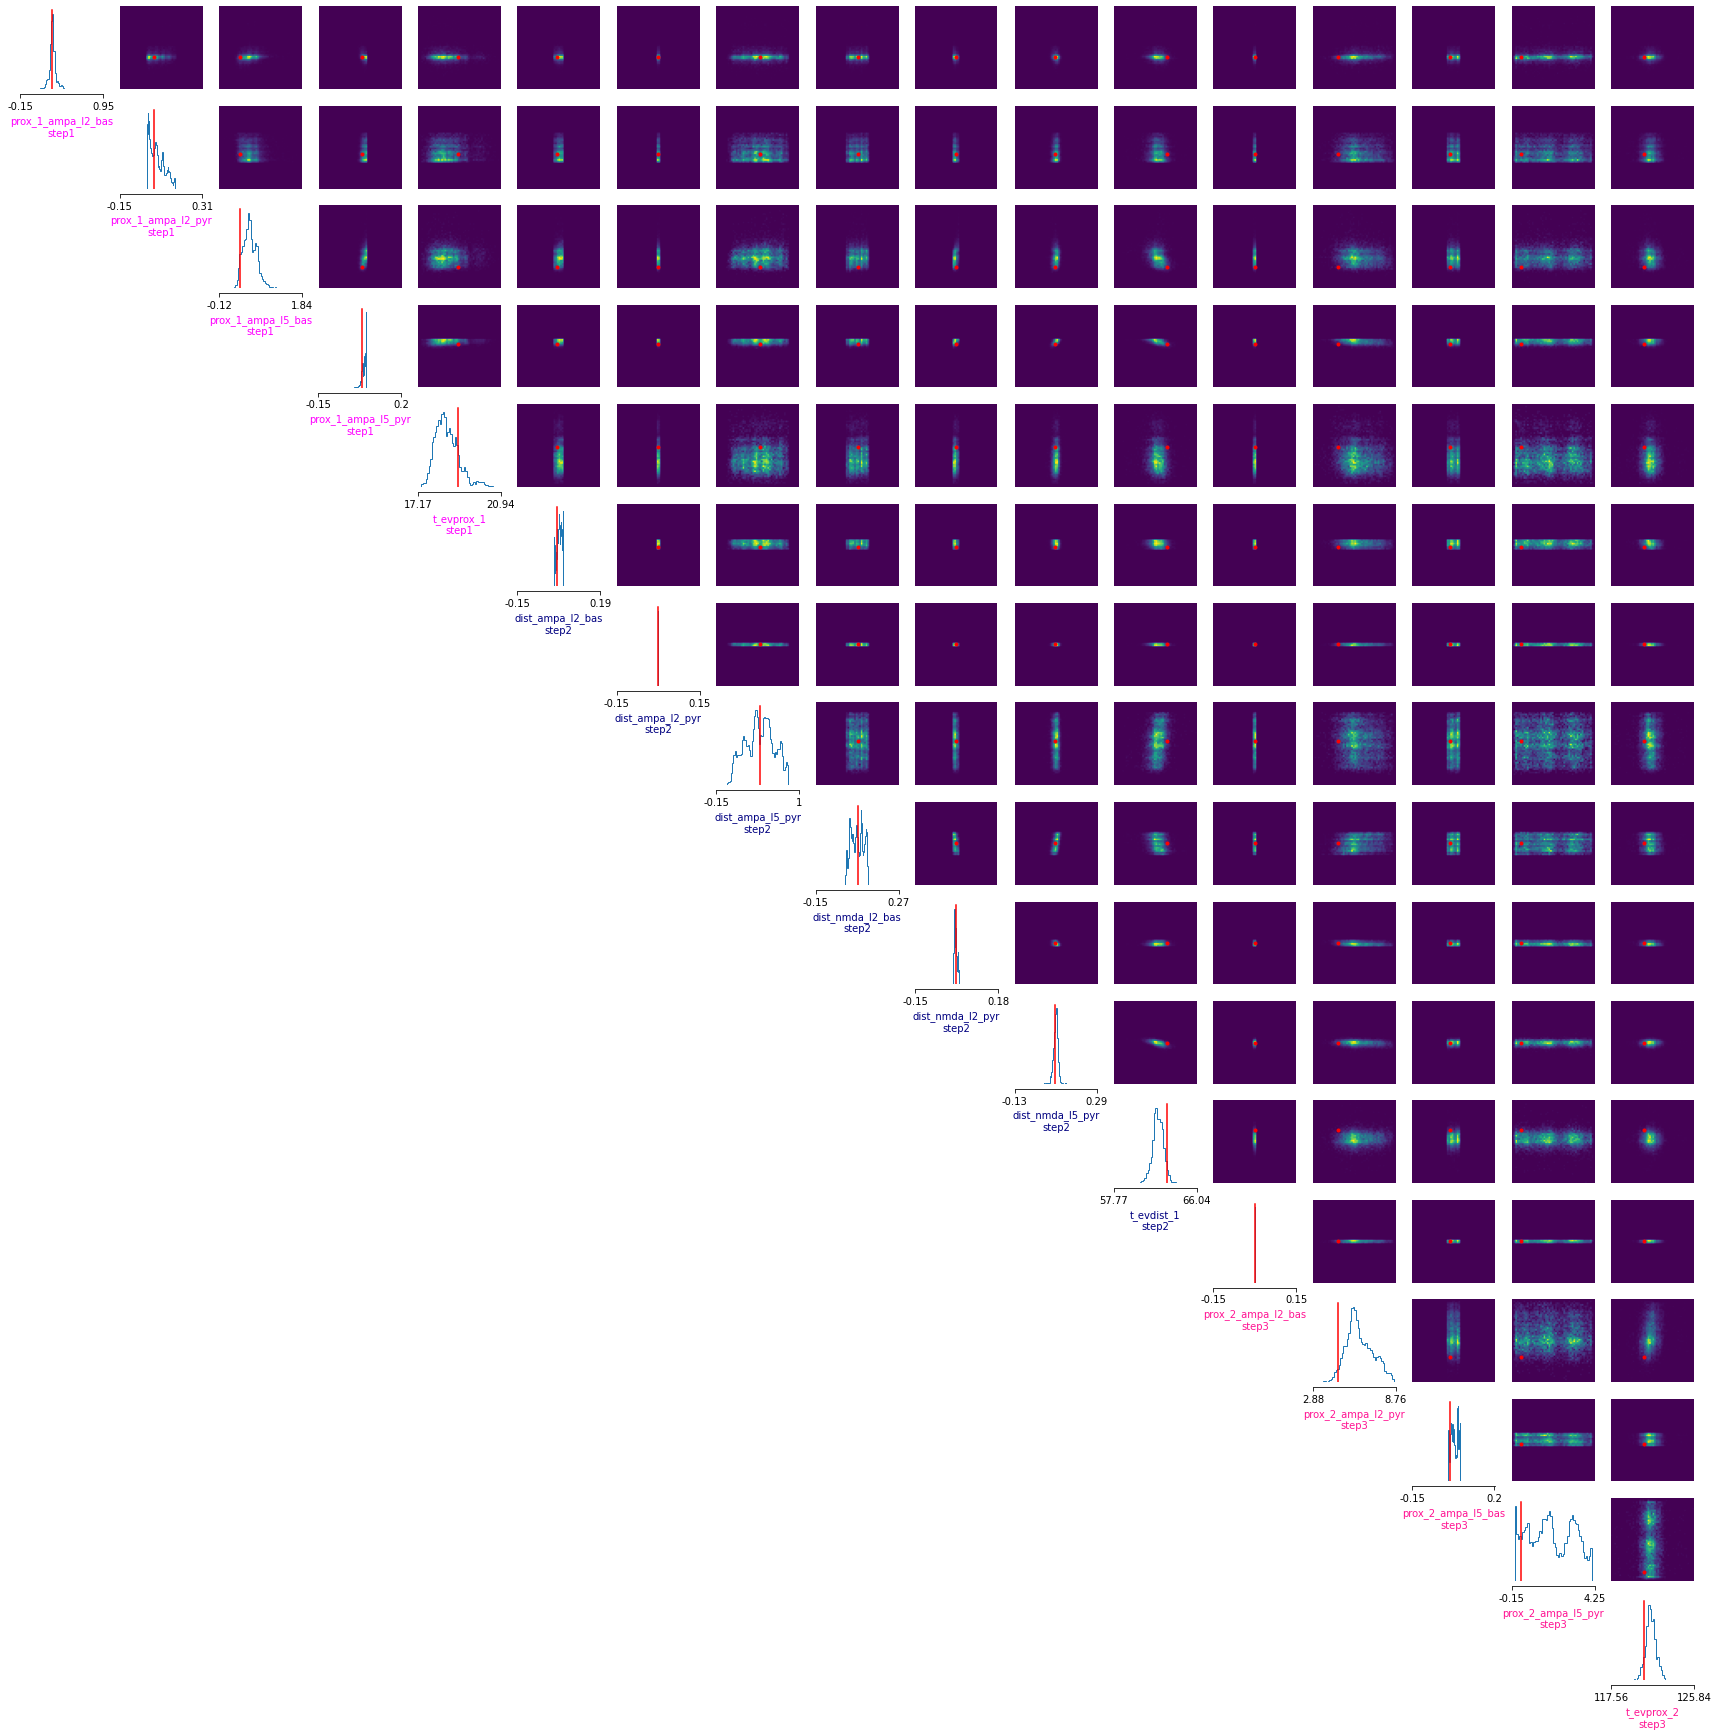

In [14]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    ticks=np.round(limits,2),
    figsize=(30, 30),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
    labels=parameter_names,
)

for i in range(5):
    axes[i][i].xaxis.label.set_color('magenta')
for i in range(5, 12):
    axes[i][i].xaxis.label.set_color('navy')
for i in range(12, 17):
    axes[i][i].xaxis.label.set_color('deeppink')

In [16]:
samples = posterior.sample((100,), x=obs_real_stat)

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [17]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

early stop 170.0
param size early stop early stop 170.017

 170.0early stop param size  17early stop170.0 170.0



param size early stopparam size  param size early stop 170.0 17 
 early stop17 
17170.0

170.0
param size 
 param size 17 
param size  1717

joblib will run over 1 jobsjoblib will run over 1 jobs
joblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobs

[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
joblib will run over 1 jobs
Building the NEURON modelBuilding the NEURON model

Building the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
Simula

Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...


Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
early stopSimulation time: 30.0 ms...
 170.0
param size  17
Simulation time: 20.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  23 tasks      | elapsed:  4.5min
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  24 tasks      | elapsed:  4.5min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Sim

Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140

param size  17
joblib will run over 1 jobs
Simulation time: 20.0 ms...
[Parallel(n_jobs=8)]: Done  47 tasks      | elapsed:  8.9min
Simulation time: 30.0 ms...
Building the NEURON model
Building the NEURON model
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  48 tasks      | elapsed:  8.9min
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 m

Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
early stop 170.0
[Parallel(n_jobs=8)]: Done  57 tasks      | elapsed: 11.4min
[Parallel(n_jobs=8)]: Done  58 tasks      | elapsed: 11.4min
param size  17
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation t

Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 80.0 ms

Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
early stop 170.0
param size  17
Simulation time: 110.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 15.8min
Building the NEURON model
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 15.9min
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  83 tasks      | elapsed: 15.9min
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 130.0 ms...
early stop 170.0
param size  17
Simulation time: 150.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  84 task

Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
[Parallel(n_jobs=8)]: Done  97 out of 100 | elapsed: 18.4min remaining:   34.2s
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 18.6min finished


In [18]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

early stopearly stop early stop  170.0early stop170.0early stop170.0early stop
 
 param size early stop170.0 17
 early stop
param size   170.0param size 
170.0
param size  
170.017

param size param size   17
param size  17
 170.0 
1717param size 
17 
17

joblib will run over 1 jobs
joblib will run over 1 jobsjoblib will run over 1 jobs

joblib will run over 1 jobs
joblib will run over 1 jobs
joblib will run over 1 jobs
joblib will run over 1 jobs
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON modelBuilding the NEURON model

Building the NEURON modelBuilding the NEURON model

Building the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 coresSimulation time: 0.03 ms...
[Done]

running trial 1 on 1 

Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...


Simulation time: 160.0 ms...
Building the NEURON model
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  23 tasks      | elapsed:  4.3min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  24 tasks      | elapsed:  4.3min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 10.0 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0

Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:  6.8min
Simulation time: 110.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100

Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
early stop 170.0
param size  17
Simulation time: 40.0 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  47 tasks      | elapsed:  8.7min
Simulation time: 40.0 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  48 tasks      | elapsed:  8.7min
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 40.0 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Sim

Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  57 tasks      | elapsed: 11.1min
Simulation time: 100.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 120.0 ms...
early stop 170.0
param size  17Simulation time: 160.0 ms...

joblib will run over 1 jobs
[Parallel

Simulation time: 40.0 ms...
Simulation time: 20.0 ms...Simulation time: 30.0 ms...

early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  72 tasks      | elapsed: 13.2min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation tim

Simulation time: 100.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 15.5min
early stop 170.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  83 tasks      | elapsed: 15.5min
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Building the NEURON model
Simulation time: 110.0 ms...
Building the NEURON model
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 130.0 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulati

Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
[Parallel(n_jobs=8)]: Done  97 out of 100 | elapsed: 17.8min remaining:   33.1s
Simulation time: 150.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...Simulation time: 90.0 ms...

Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 18.2min finished


In [19]:
s_x_torch = torch.stack(([s_x[i] for i in range(len(s_x))]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(len(s_x_prior))]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



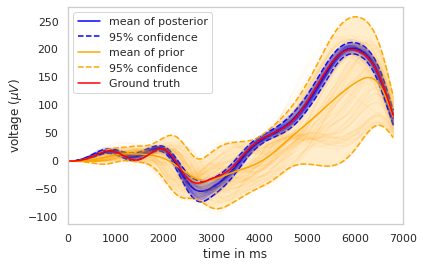

In [24]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real[0], label='Ground truth', color='red')



plt.legend()

## Evaluation of features

In [28]:
import matplotlib.cm as cm
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torch import Tensor
from typing import Tuple, List, Optional, Dict
from matplotlib.pyplot import Axes
from matplotlib.figure import Figure
from matplotlib.colors import LogNorm


In [68]:
t = obs_real_stat

t

tensor([[ 1.9490e+03,  2.7060e+03,  5.9300e+03,  2.1558e+01, -4.0164e+01,
          1.9919e+02,  1.5108e+01,  6.7586e+01,  1.9520e+02,  3.2594e+01,
          7.0213e+03,  1.2655e+01,  2.1028e+04, -1.1747e+04,  1.6931e+04,
         -2.2304e+04,  3.4816e+05,  0.0000e+00,  4.7747e+01,  7.9176e+00]],
       dtype=torch.float64)

In [74]:
# t.shape

t1 = torch.cat((t[:,:1], t[:,1+1:]), axis = 1)
print(t1)
t1.shape

tensor([[ 1.9490e+03,  5.9300e+03,  2.1558e+01, -4.0164e+01,  1.9919e+02,
          1.5108e+01,  6.7586e+01,  1.9520e+02,  3.2594e+01,  7.0213e+03,
          1.2655e+01,  2.1028e+04, -1.1747e+04,  1.6931e+04, -2.2304e+04,
          3.4816e+05,  0.0000e+00,  4.7747e+01,  7.9176e+00]],
       dtype=torch.float64)


torch.Size([1, 19])

In [54]:
posterior.set_default_x(obs_real_stat)

DirectPosterior(
               method_family=snpe,
               net=<a Flow, see `.net` for details>,
               prior=BoxUniform(Uniform(low: torch.Size([17]), high: torch.Size([17])), 1),
               x_shape=torch.Size([1, 20]))
               

In [55]:
thetas = posterior.sample((10000,))
thetas.shape

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000, 17])

In [79]:

for i in range(20):
    x = calculate_summary_stats_temporal(x_without)
    #leaving one summary statistic out
    x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
    print(x_c.shape)
    print('t shape', t.shape)
    print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
    inf = SNPE(prior=prior, density_estimator = 'nsf')
    inf = inf.append_simulations(thetas, x_c)
    density_estimator = inf.train()
    posterior1 = inf.build_posterior(density_estimator)
    globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))


torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

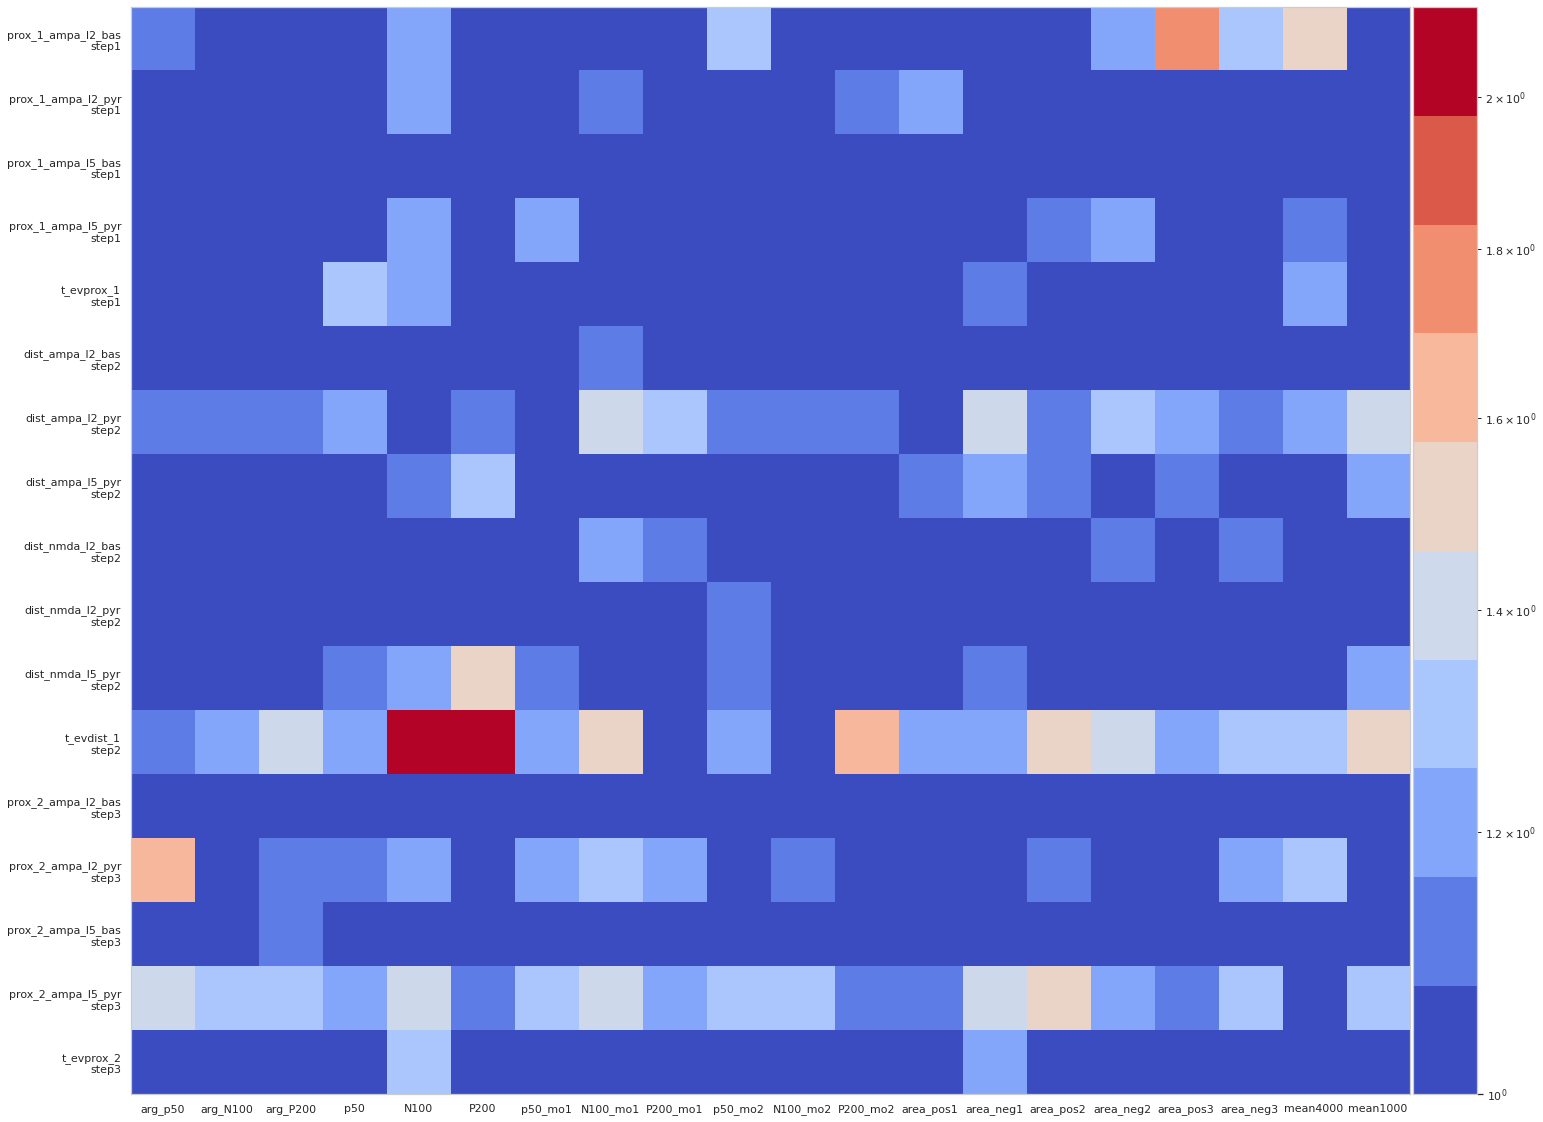

In [106]:
sum_stats_names =                 [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_mo1',
                    'N100_mo1',
                    'P200_mo1',
                    'p50_mo2',
                    'N100_mo2',
                    'P200_mo2',
                    'area_pos1',
                    'area_neg1',
                    'area_pos2',
                    'area_neg2',
                    'area_pos3',
                    'area_neg3',
                    'mean4000',
                    'mean1000'
                ]

sample_list = []
for i in range(20):
    sample_list.append(globals()['samples_%s' % i] )

    
plt.figure(figsize = (25,20))
im = plot_varchanges(sample_list, samples, xticklabels=sum_stats_names, yticklabels= parameter_names, plot_label='', batchsize=0)
plt.show(im)

In [120]:
sample_batch = []
batch_size = 5

for i in range(batch_size):

    sample_list = []
    
    for i in range(20):
        

        x = calculate_summary_stats_temporal(x_without)
        #leaving one summary statistic out
        x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
        print(x_c.shape)
        print('t shape', t.shape)
        print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
        inf = SNPE(prior=prior, density_estimator = 'nsf')
        inf = inf.append_simulations(thetas, x_c)
        density_estimator = inf.train()
        posterior1 = inf.build_posterior(density_estimator)
        globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))
        
        sample_list.append(globals()['samples_%s' % i] )
        
    sample_batch.append(sample_list)

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 36 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 36 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])


KeyboardInterrupt: 

In [119]:
sample_batch

[]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'voltage ($\\mu V$)')

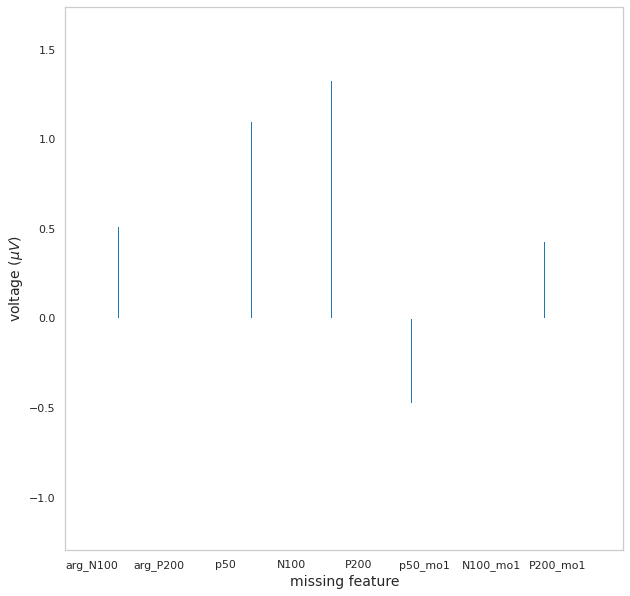

In [117]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)


plot_KLs(sample_list,
        samples,
        idx=0,
        batchsize=0,
         kind='bar',
        agg_with='mean'
    )


axes.set_xlabel("missing feature", size=14)
axes.set_xticklabels(sum_stats_names)
ax.tick_params(axis="both", which="major", labelsize=12)
ylabel = ax.get_ylabel()
axes.set_ylabel(ylabel, size=14)


In [121]:
s_x_prior_stat = calculate_summary_stats_temporal(s_x_prior)
s_x_stat = calculate_summary_stats_temporal(s_x)
                                                

In [134]:
t[0]

tensor([ 1.9490e+03,  2.7060e+03,  5.9300e+03,  2.1558e+01, -4.0164e+01,
         1.9919e+02,  1.5108e+01,  6.7586e+01,  1.9520e+02,  3.2594e+01,
         7.0213e+03,  1.2655e+01,  2.1028e+04, -1.1747e+04,  1.6931e+04,
        -2.2304e+04,  3.4816e+05,  0.0000e+00,  4.7747e+01,  7.9176e+00],
       dtype=torch.float64)

34.410999999999994
8.821
9.030999999999999
0.3426654206472814
1.1908244735227738
0.7454976427279791
0.2929940479865423
0.4804624729637844
0.7634706273832214
1.0836820944991712
73.10182756863495
0.595378369776133
426.12008548256523
408.09902244746615
340.98481557103173
727.042788425355
1380.5021171318183
0.001
0.5525858938078323
0.16738297339680588


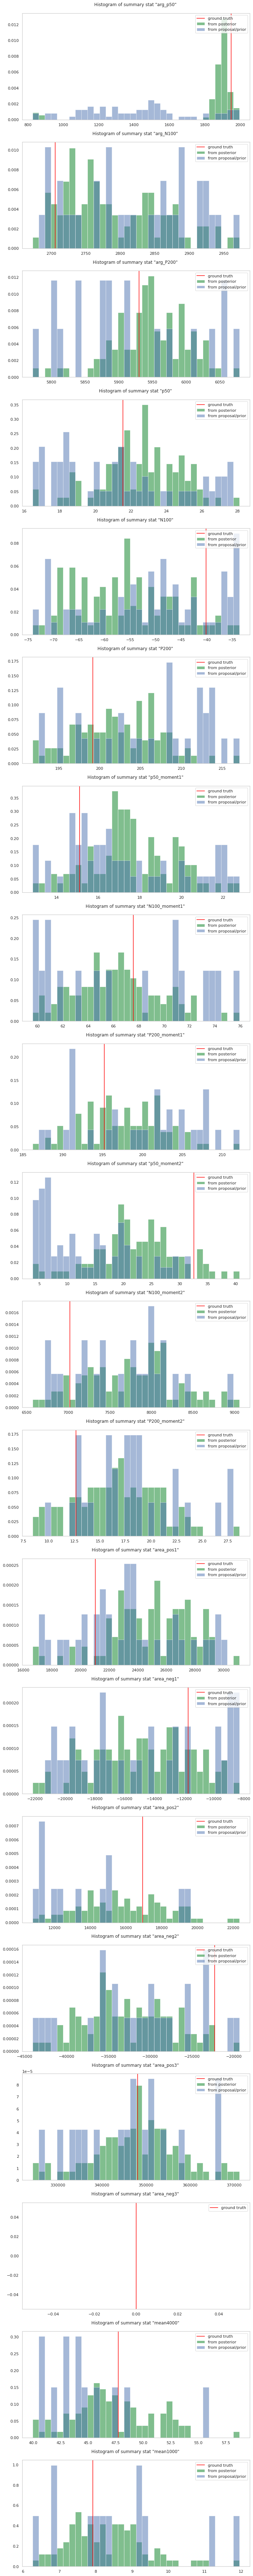

In [137]:
import matplotlib.gridspec as gridspec

sum_stats_names =                  [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_moment1',
                    'N100_moment1',
                    'P200_moment1',
                    'p50_moment2',
                    'N100_moment2',
                    'P200_moment2',
                    'area_pos1',
                    'area_neg1',
                    'area_pos2',
                    'area_neg2',
                    'area_pos3',
                    'area_neg3',
                    'mean4000',
                    'mean1000'
                ]

fig = plt.figure(figsize=(10,5*len(s_x_stat[0])), tight_layout=True)

gs = gridspec.GridSpec(nrows=len(sum_stats_names), ncols=1)



#fig.suptitle('Summary stats histogram from posterior predictions.', y=0.2, fontsize=16)


for i in range(len(sum_stats_names)):

    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []
    globals()['x%s' % i] = []

    for j in range(len(s_x)):
        globals()['sum_stats%s' % i].append(float(s_x_stat[j][i]))
        globals()['x%s' % i].append(float(s_x_prior_stat[j][i]))

    sum_stat = globals()['sum_stats%s' % i]
    
    
    ##define bins such that we get an equal number of bins at the end
    
    binsteps = np.abs(max(sum_stat)-min(sum_stat))*0.03 + 0.001
    
    print(binsteps)
   
    binrange = np.arange(min(sum_stat), max(sum_stat) + binsteps, binsteps)
    
   
    
    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i],  density=True, bins = binrange,  facecolor='g', alpha=0.75, histtype='barstacked', label='from posterior')
    globals()['ax%s' % i].hist(globals()['x%s' % i],  density=True, bins = binrange,   facecolor='b', alpha=0.5, histtype='barstacked', label='from proposal/prior')
    
  
    globals()['ax%s' % i].set_title('Histogram of summary stat "{}" '.format(sum_stats_names[i]), pad=20)
    #ax0.set(ylim=(-500, 7000))

    globals()['ax%s' % i].axvline(t[0][i].detach().numpy(), color='red', label='ground truth')
    globals()['ax%s' % i].legend(loc='upper right')